In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


df = pd.read_csv("default_credit.csv")
df=df.drop(['index'],axis=1)

In [20]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


<AxesSubplot:title={'center':'balance'}, xlabel='[student]'>

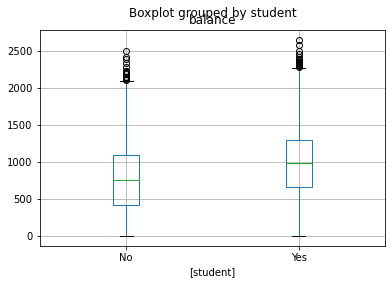

In [21]:
df.boxplot(column=['balance'], by=['student'])

<AxesSubplot:title={'center':'income'}, xlabel='[student]'>

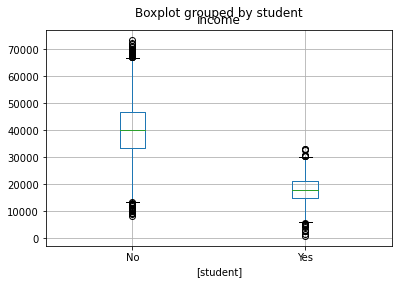

In [22]:
df.boxplot(column=['income'], by=['student'])

<AxesSubplot:title={'center':'balance'}, xlabel='[default]'>

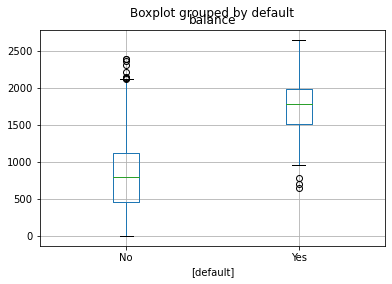

In [23]:
df.boxplot(column=['balance'], by=['default'])

<AxesSubplot:title={'center':'income'}, xlabel='[default]'>

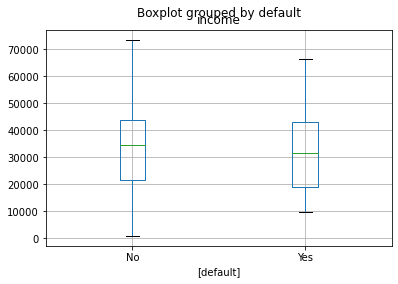

In [24]:
df.boxplot(column=['income'], by=['default'])

/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ginaozimisa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


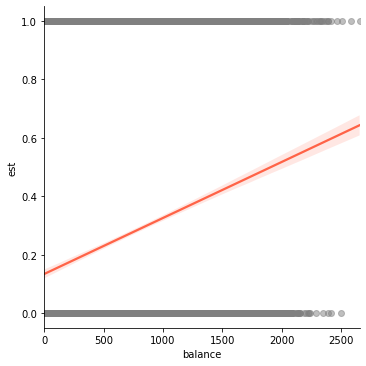

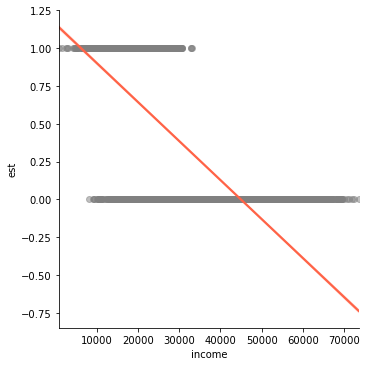

In [25]:
df['est']=np.where(df['student']=='No',0,1)
df['defa']=np.where(df['student']=='No',0,1)
sns.lmplot('balance','est', df,line_kws={'color':'tomato'},scatter_kws={'color': 'grey', 'alpha': .5})
sns.lmplot('income','est', df,line_kws={'color':'tomato'},scatter_kws={'color': 'grey', 'alpha': .5})


# Desafio 3

In [26]:

df['est']

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: est, Length: 10000, dtype: int64

In [27]:
def concise_summary(mod, print_fit=True):
    #guardamos los parámetros asociados a estadísticas de ajuste
    fit = pd.DataFrame({'Statistics': mod.summary2().tables[0][2][2:],
    'Value': mod.summary2().tables[0][3][2:]})
    # guardamos los parámetros estimados por cada regresor.
    estimates = pd.DataFrame(mod.summary2().tables[1].loc[:, 'Coef.':
    'Std.Err.'])
    # imprimir fit es opcional
    if print_fit is True:
        print("\nGoodness of Fit statistics\n", fit)
        print("\nPoint Estimates\n\n", estimates)

m1_logit = smf.logit("defa ~ balance + income", df).fit()
concise_summary(m1_logit)

Optimization terminated successfully.
         Current function value: 0.165682
         Iterations 9

Goodness of Fit statistics
         Statistics      Value
2             BIC:  3341.2610
3  Log-Likelihood:    -1656.8
4         LL-Null:    -6060.4
5     LLR p-value:     0.0000
6           Scale:     1.0000
7                            

Point Estimates

               Coef.  Std.Err.
Intercept  8.569420  0.236162
balance    0.000947  0.000095
income    -0.000393  0.000010


# Desafio 4

In [41]:
std_matrix = StandardScaler().fit_transform(df.loc[:,'balance':'income'])
X_train, X_test, y_train, y_test =train_test_split(std_matrix, df['defa'],test_size=.33, random_state=11238)

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
default_model = LogisticRegression().fit(X_train_std, y_train)

In [42]:
default_model.coef_

array([[ 0.47762379, -5.04195635]])

In [43]:
yhat = default_model.predict(X_test_std)
yhat[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [44]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2342
           1       0.88      0.93      0.90       958

    accuracy                           0.94      3300
   macro avg       0.92      0.94      0.93      3300
weighted avg       0.94      0.94      0.94      3300



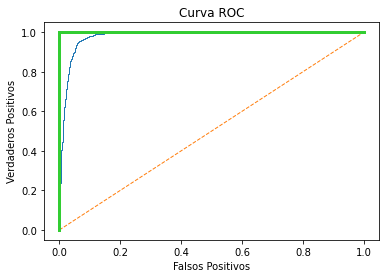

In [45]:
yhat = default_model.predict_proba(X_test)[:, 1]

false_positive, true_positive, threshold = roc_curve(y_test, yhat)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');